In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp
import h5py
import allel

sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/hapBLOCK/IO/")  # hack to get development package first in path
from h5_load import get_coverage,get_genos_pairs,get_idx_iid,get_markers_good

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

compute-a-16-167.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 32


In [93]:
def opp_homos(g1, g2):
    """Return opposing homozygotes"""
    o1 = (g1 == 0) & (g2 == 2)
    o2 = (g1 == 2) & (g2 == 0)
    return (o1 | o2)

def plot_hets(map_het, het, het_c="slateblue", c_roh="seagreen", 
              figsize=(14,2), cm_lim=[], fs = 12,
              alpha=0.3, ms=1, lw = 12, title="", plot=True, min_cm=0, 
              ylabel = f"Opp. Homozygote (y/n)", savepath=""):
    """Plot Heterozygotes against genenetic map,
    plus ROH calls.
    lw: Linewidth of ROH""" 
    plt.figure(figsize=figsize)
    ax1 = plt.gca()
    ax1.plot(map_het*100, (het * 1.1 - 0.05), "o", ms=ms, alpha=alpha, zorder=0, color=het_c)
    ax1.set_xlabel("centimorgan", fontsize=fs)
    ax1.set_ylim([-0.1, 1.1])
    
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks(np.array([1,0]) * 1.1 - 0.05)
    ax2.set_yticklabels([])
    ax1.set_yticklabels([])

    
    ax2.set_ylabel(ylabel, fontsize=fs*0.8, color=het_c, rotation=270, labelpad=fs)
     
    if len(cm_lim)==2:
        ax1.set_xlim(cm_lim)
        
    if len(title)>0:
        ax1.set_title(title, fontsize=fs)
        
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
        print(f"Saved figure to: {savepath}")
        #plt.savefig(folder + "posterior_cm.png", bbox_inches = 'tight', pad_inches = 0, dpi=300)
    
    if plot:
        plt.show()  

# Mother Son

In [9]:
f = h5py.File("./data/hdf5/1240k_v43/ch3.h5", "r") # Load for Sanity Check. See below!

j1 = get_idx_iid(f, "SUC002")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "SUC003")
print(get_coverage(f, j2))

0.6753323052067269
0.7290519203936257


In [10]:
g1, g2, m = get_genos_pairs(f, sample1="SUC002", sample2="SUC003", 
                            cutoff=0.98, output=True)
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

Filtering to 0.98 GP variants: 0.879x
Filtering to 0.98 GP variants: 0.899x
Filtering to common GP variants: 0.822x


8.930697785186949e-05

Saved figure to: ./figs/principle_proof/parent_offspring.png


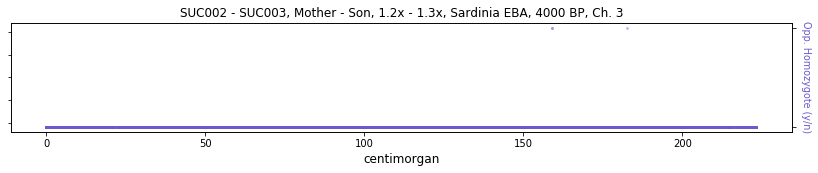

In [11]:
plot_hets(m, o_homos, title="SUC002 - SUC003, Mother - Son, 1.2x - 1.3x, Sardinia EBA, 4000 BP, Ch. 3",
          ms=2, savepath="./figs/principle_proof/parent_offspring.png")

In [12]:
f.close()

# 3rd degree relatives, Punic

In [ ]:
j1 = get_idx_iid(f, "I18199")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "I18201")
print(get_coverage(f, j2))

Filtering to 0.98 GP variants: 0.655x
Filtering to 0.98 GP variants: 0.727x
Filtering to common GP variants: 0.545x
Saved figure to: ./figs/villaricos/18201_18203_ch12.png


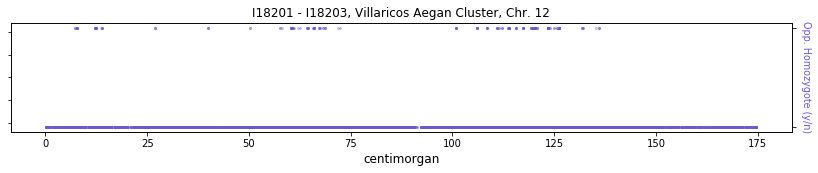

In [91]:
f = h5py.File("./data/hdf5/1240k_v43/ch12.h5", "r") # Load for Sanity Check. See below!

g1, g2, m = get_genos_pairs(f, sample1="I18203", sample2="I18201", 
                            cutoff=0.98, output=True)

o_homos = opp_homos(g1, g2)
np.mean(o_homos)

plot_hets(m, o_homos, title="I18201 - I18203, Villaricos Aegan Cluster, Chr. 12",
          ms=2, savepath="./figs/villaricos/18201_18203_ch12.png") # ./figs/villaricos/18199_18203_ch1.png
f.close()

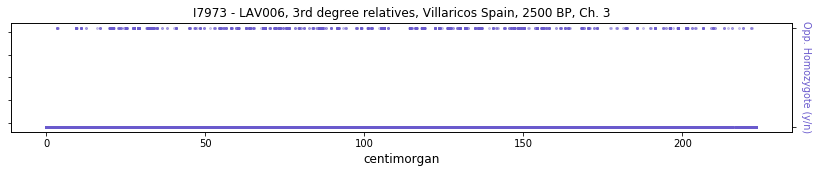

In [224]:
plot_hets(m, o_homos, title="I7973 - LAV006, 3rd degree relatives, Villaricos Spain, 2500 BP, Ch. 3",
          ms=2, savepath="") # ./figs/principle_proof/3rd_degree.png

In [149]:
f.close()

# Reference unrelated pair

In [261]:
f = h5py.File("./data/hdf5/1240k_v43/ch3.h5", "r") # Load for Sanity Check. See below!

In [262]:
j1 = get_idx_iid(f, "SUC002")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "SUC008")
print(get_coverage(f, j2))

0.6753323052067269
0.888032116716849


In [263]:
%%time
g1, g2, m = get_genos_pairs(f, sample1="SUC002", sample2="SUC008", 
                            cutoff=0.98, output=True)

Filtering to 0.98 GP variants: 0.879x
Filtering to 0.98 GP variants: 0.923x
Filtering to common GP variants: 0.833x
CPU times: user 485 ms, sys: 66.4 ms, total: 551 ms
Wall time: 544 ms


In [264]:
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

0.0412577137819571

Saved figure to: ./figs/principle_proof/unrelated.png


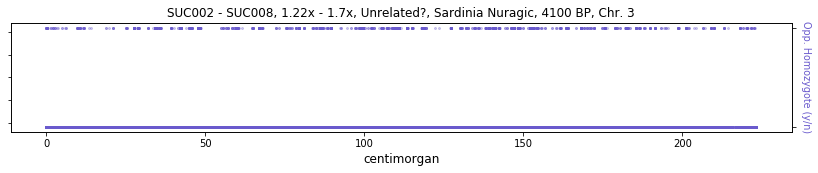

In [267]:
plot_hets(m, o_homos, title="SUC002 - SUC008, 1.22x - 1.7x, Unrelated?, Sardinia Nuragic, 4100 BP, Chr. 3", ms=2,
          savepath="./figs/principle_proof/unrelated.png")

In [89]:
f.close()

### Siblings

In [90]:
f = h5py.File("./data/hdf5/1240k_v43/ch9.h5", "r") # Load for Sanity Check. See below!

In [91]:
j1 = get_idx_iid(f, "COR001")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "COR002")
print(get_coverage(f, j2))

0.8464538858365138
1.1300381663381285


In [92]:
%%time
g1, g2, m = get_genos_pairs(f, sample1="COR001", sample2="COR002", 
                            cutoff=0.98, output=True)
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

Filtering to 0.98 GP variants: 0.904x
Filtering to 0.98 GP variants: 0.935x
Filtering to common GP variants: 0.867x
CPU times: user 421 ms, sys: 48 ms, total: 469 ms
Wall time: 463 ms


0.015429262394195889

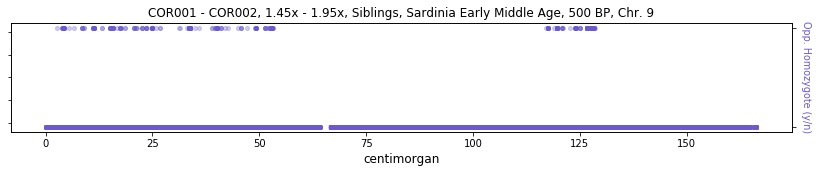

In [96]:
plot_hets(m, o_homos, title="COR001 - COR002, 1.45x - 1.95x, Siblings, Sardinia Early Middle Age, 500 BP, Chr. 9", ms=4,
          cm_lim=[], savepath="") # ./figs/principle_proof/siblings.png

In [62]:
f.close()

# Different genotypes

In [36]:
%%time
g1, g2, m = get_genos_pairs(f, sample1="COR001", sample2="COR002", 
                            cutoff=0.98, output=True)
diff = (g1!=g2)
#np.mean(g1==2)

Filtering to 0.98 GP variants: 0.920x
Filtering to 0.98 GP variants: 0.945x
Filtering to common GP variants: 0.887x
CPU times: user 450 ms, sys: 79.5 ms, total: 529 ms
Wall time: 524 ms


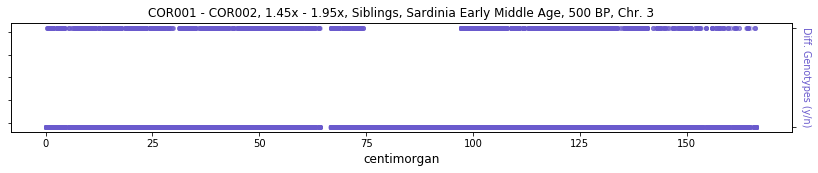

In [100]:
plot_hets(m, diff, title="COR001 - COR002, 1.45x - 1.95x, Siblings, Sardinia Early Middle Age, 500 BP, Chr. 3", ms=4,
          ylabel = f"Diff. Genotypes (y/n)", savepath="")

### Low Coverage Example

In [68]:
%%time

iid1, iid2 = "Bon001.SG", "ZHJ_BON024.A0101_Luk84"

f = h5py.File("./data/hdf5/1240k_v43/ch1.h5", "r") # Load for Sanity Check. See below!
g1, g2, m = get_genos_pairs(f, sample1=iid1, sample2=iid2, 
                            cutoff=0.99, output=True)
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

Filtering to 0.99 GP variants: 0.592x
Filtering to 0.99 GP variants: 0.781x
Filtering to common GP variants: 0.535x
CPU times: user 510 ms, sys: 92.1 ms, total: 603 ms
Wall time: 614 ms


0.00043100070527388136

Saved figure to: ./figs/principle_proof/po_anatolia.png


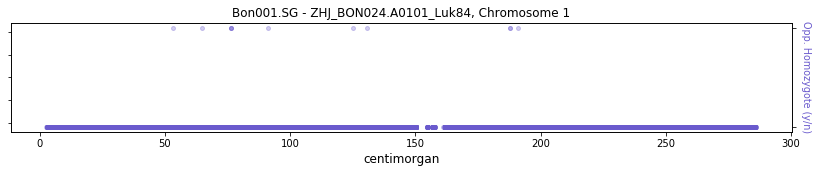

In [71]:
plot_hets(m, o_homos, title="Bon001.SG - ZHJ_BON024.A0101_Luk84, Chromosome 1", ms=4,
          cm_lim=[], savepath="./figs/principle_proof/po_anatolia.png") # ./figs/principle_proof/siblings.png

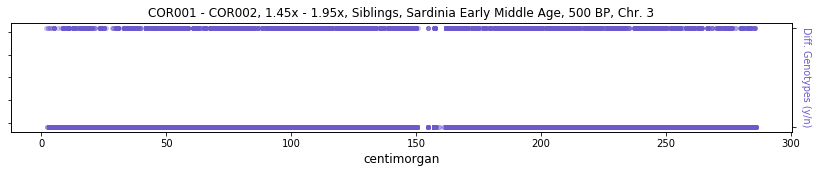

In [57]:
diff = (g1!=g2)

plot_hets(m, diff, title="COR001 - COR002, 1.45x - 1.95x, Siblings, Sardinia Early Middle Age, 500 BP, Chr. 3", ms=4,
          ylabel = f"Diff. Genotypes (y/n)", savepath="")

### Theoretical Expectation

In [253]:
p = f["variants/RAF"][:,0]
c_o_homo = 2 * p * p * (1-p) * (1-p)
np.mean(c_o_homo)

0.05257442

In [37]:
p = f["variants/RAF"][:,0]
np.mean(p*p)

0.14480914